In [1]:
import os as os
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider
import boto3
s3 = boto3.resource('s3')
# Print out bucket names
bucket=s3.Bucket('npfiles-rank-estimation')
for object in bucket.objects.all():
    if object.size!=0:
        base,key=os.path.split(object.key)
        if "rerun" in base:
            continue
        if not os.path.exists(f"../np_files/{base}"):
            os.makedirs(f"../np_files/{base}")
        if os.path.exists(f"../np_files/{object.key}"):
            continue
        bucket.download_file(object.key, f"../np_files/{object.key}")

In [2]:

svds=[]
eigenvalues_all=[]
ranks=[]
for i in range(32):
    svds.append(np.load("../np_files/svd_block"+str(i)+".npy",allow_pickle=True))
    eigenvalues_all.append(np.load("../np_files/eigenvalues_block"+str(i)+".npy",allow_pickle=True))
    with open("../np_files/rank_block"+str(i)+".txt") as f:
        ranks.append(int(f.readline()))

In [3]:

xmax=np.max([np.max(s) for s in svds])
xmin=np.min([np.min(s) for s in svds])

def fig_svd(n):
    svd=svds[n]
    plt.figure()
    plt.hist(svd,bins=100)
    plt.xlim(xmin,xmax)
    plt.show()

def fig_eig(n):
    eigenvalues=eigenvalues_all[n]
    x=eigenvalues.real
    y=eigenvalues.imag
    plt.figure()
    plt.scatter(x,y,alpha=0.2)
    plt.title("Eigenvalues for block "+str(n))
    plt.axis('equal')
    plt.show()

interact(fig_svd,n=IntSlider(min=0,max=len(svds)-1,step=1,value=0))

interactive(children=(IntSlider(value=0, description='n', max=31), Output()), _dom_classes=('widget-interact',…

<function __main__.fig_svd(n)>

In [4]:
interact(fig_eig,n=IntSlider(min=0,max=len(svds)-1,step=1,value=0))

interactive(children=(IntSlider(value=0, description='n', max=31), Output()), _dom_classes=('widget-interact',…

<function __main__.fig_eig(n)>

In [5]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [6]:
eigenvalues_training=np.load("../np_files/finetuning/eigenvalues_all.npy")
np.shape(eigenvalues_training)

(136, 32, 2)

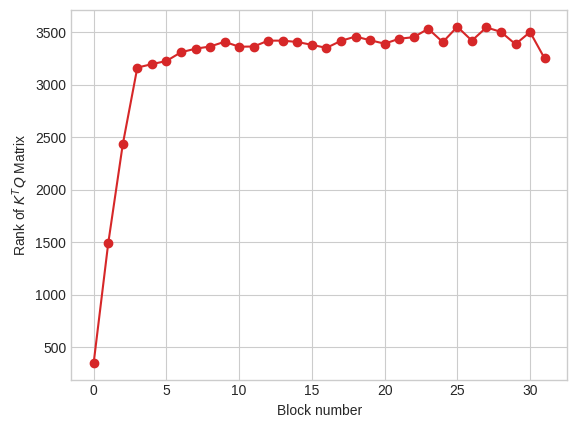

In [7]:
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid')
L=sns.color_palette("tab10")
color=L[3]
plt.figure()
plt.plot(ranks,"-o",color=color)
plt.xlabel("Block number")
plt.ylabel("Rank of $K^TQ$ Matrix")
plt.savefig("../figures/rank_plot.pdf")
plt.show()

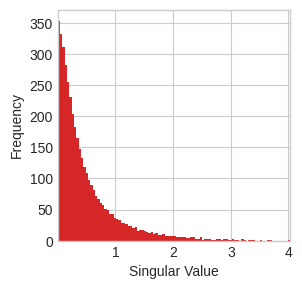

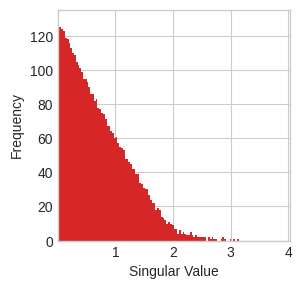

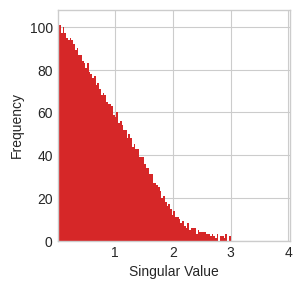

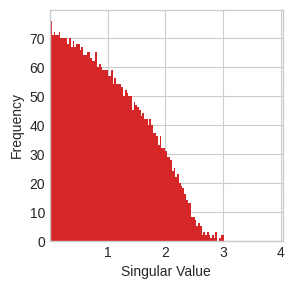

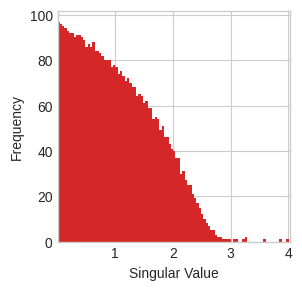

In [8]:
inds=[i*(len(svds)-1)//4 for i in range(5)]
xmin=np.min([np.min(svds[ind]) for ind in inds])
xmax=np.max([np.max(svds[ind]) for ind in inds])
for ind in inds:
    svd=svds[ind]
    fig,ax=plt.subplots(figsize=(3,3))
    ax.hist(svd,bins=100,color=color)
    ax.set_xlim(xmin,xmax)
    ax.set_xlabel("Singular Value")
    ax.set_ylabel("Frequency")
    plt.savefig(f"../figures/svd_histograms{ind}.pdf",bbox_inches='tight')
    plt.show()


In [9]:
len(svds)

32

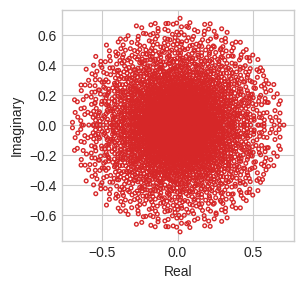

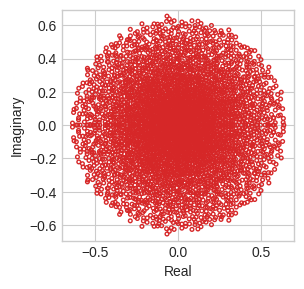

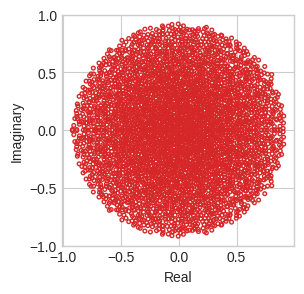

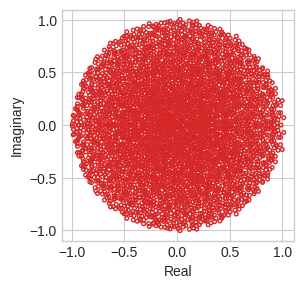

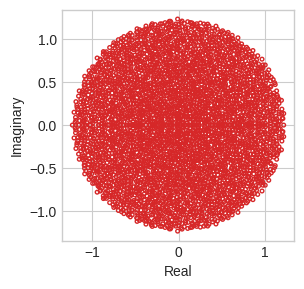

In [10]:
inds=[0,1,2,15,31]
for ind in inds:
    eigenvalues=eigenvalues_all[ind]
    x=eigenvalues.real
    y=eigenvalues.imag
    fig,ax=plt.subplots(figsize=(3,3))
    ax.scatter(x,y,facecolors='none', edgecolors=color,s=7)
    # ax.set_title("Eigenvalues for block "+str(ind))
    ax.set_xlabel("Real")
    ax.set_ylabel("Imaginary")
    ax.axis('equal')
    plt.savefig(f"../figures/eigenvalues_{ind}.pdf",bbox_inches='tight')
    plt.show()

In [11]:
import pandas as pd
real=[]
imag=[]
block=[]
checkpoint=[]
num_ckpts,num_blocks,num_eigs=np.shape(eigenvalues_training)
for i in range(num_ckpts):
    for j in range(num_blocks):
        for k in range(num_eigs):
            real.append(eigenvalues_training[i,j,k].real)
            imag.append(eigenvalues_training[i,j,k].imag)
            block.append(j)
            checkpoint.append(25*(i+1))
df=pd.DataFrame({"real":real,"imag":imag,"block":block,"checkpoint":checkpoint})

Block 0


/tmp/ipykernel_142606/2684705167.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("viridis")


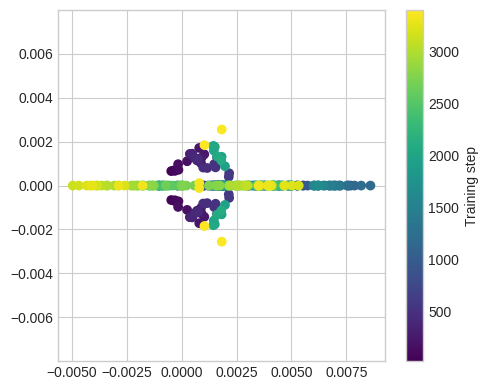

Block 1


/tmp/ipykernel_142606/2684705167.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("viridis")


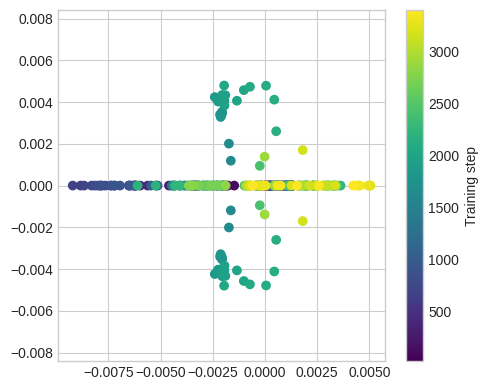

Block 2


/tmp/ipykernel_142606/2684705167.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("viridis")


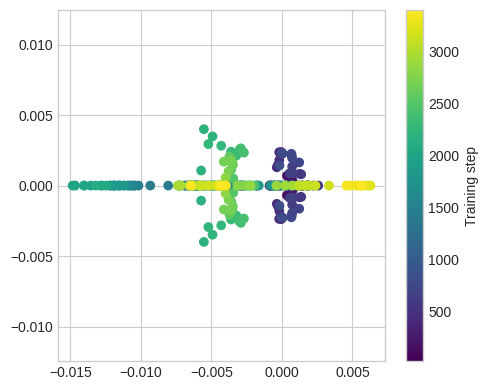

Block 3


/tmp/ipykernel_142606/2684705167.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("viridis")


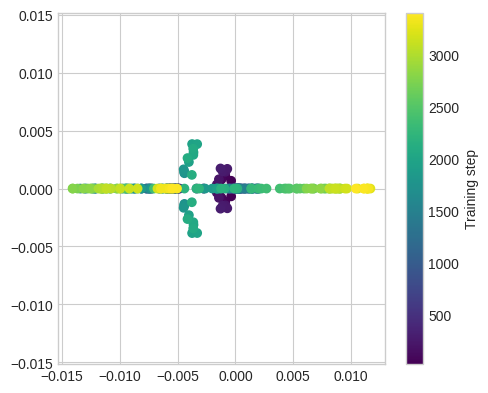

Block 4


/tmp/ipykernel_142606/2684705167.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("viridis")


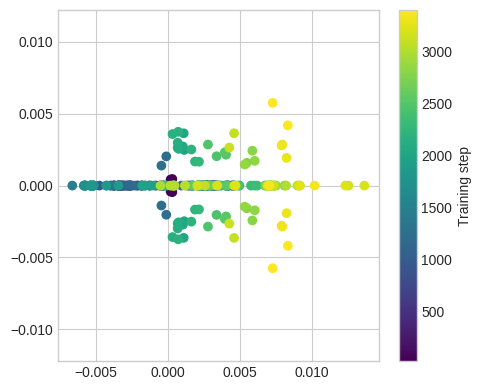

Block 5


/tmp/ipykernel_142606/2684705167.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("viridis")


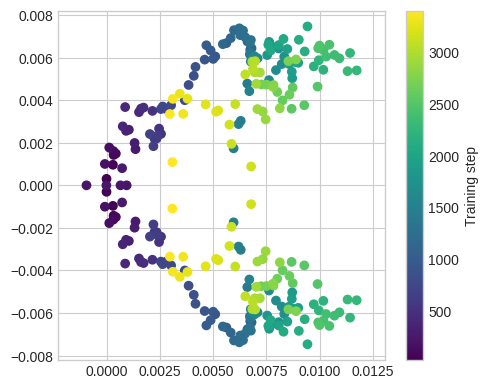

Block 6


/tmp/ipykernel_142606/2684705167.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("viridis")


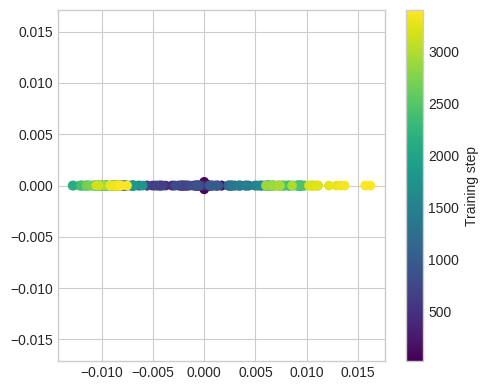

Block 7


/tmp/ipykernel_142606/2684705167.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("viridis")


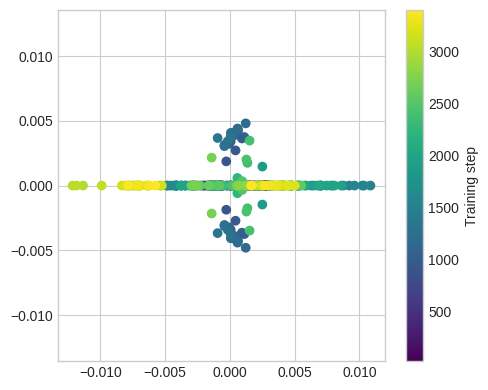

Block 8


/tmp/ipykernel_142606/2684705167.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("viridis")


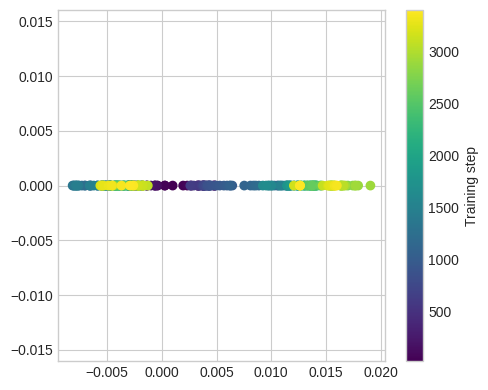

Block 9


/tmp/ipykernel_142606/2684705167.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("viridis")


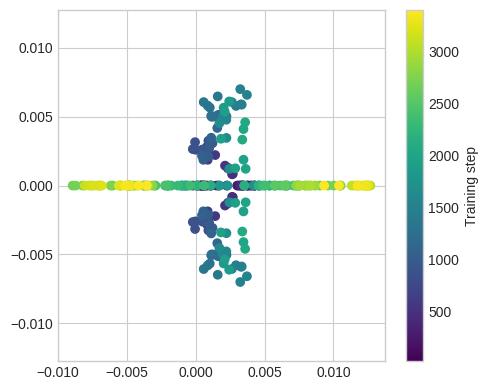

Block 10


/tmp/ipykernel_142606/2684705167.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("viridis")


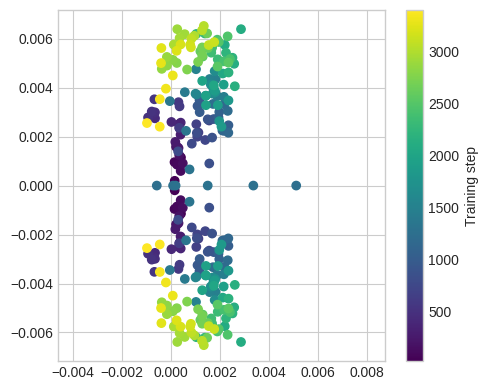

Block 11


/tmp/ipykernel_142606/2684705167.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("viridis")


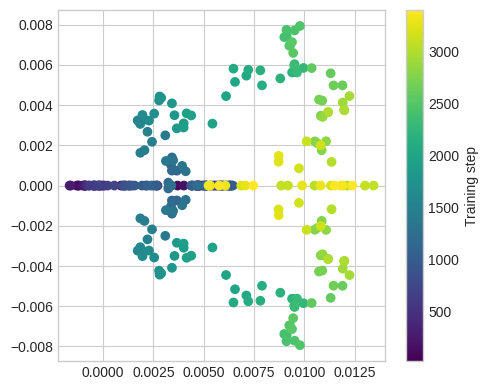

Block 12


/tmp/ipykernel_142606/2684705167.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("viridis")


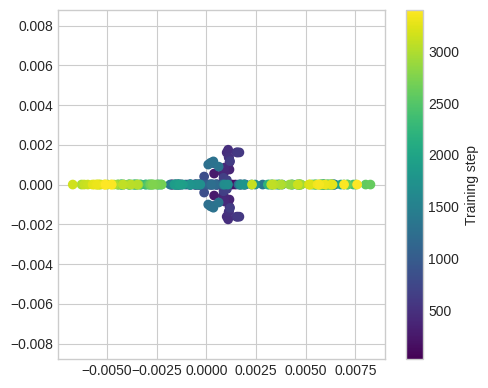

Block 13


/tmp/ipykernel_142606/2684705167.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("viridis")


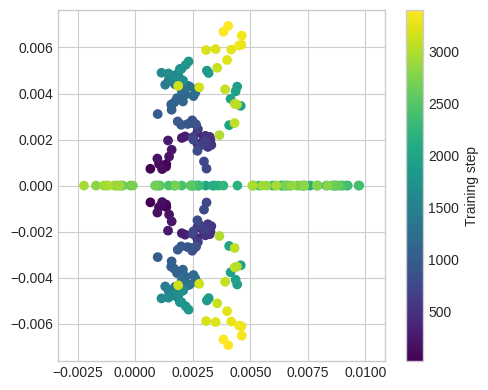

Block 14


/tmp/ipykernel_142606/2684705167.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("viridis")


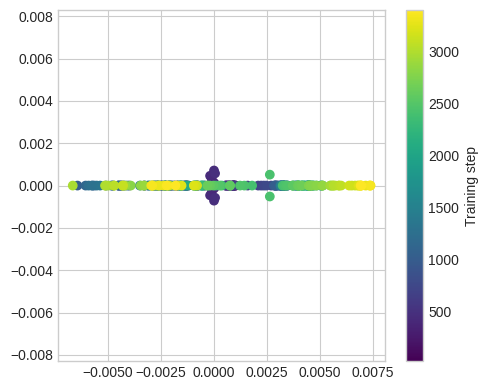

Block 15


/tmp/ipykernel_142606/2684705167.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("viridis")


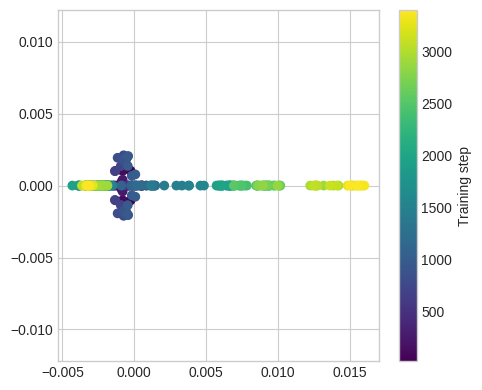

Block 16


/tmp/ipykernel_142606/2684705167.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("viridis")


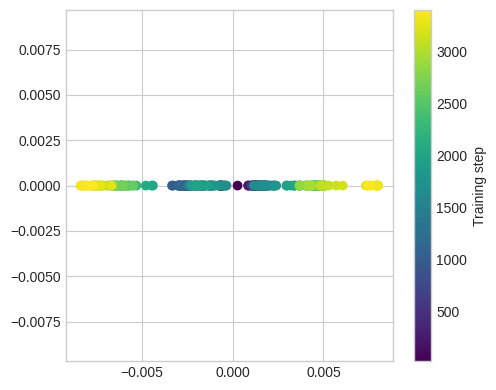

Block 17


/tmp/ipykernel_142606/2684705167.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("viridis")


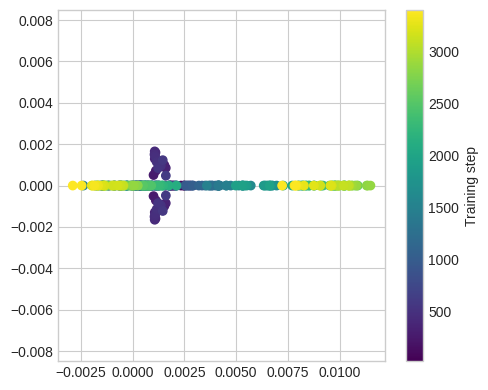

Block 18


/tmp/ipykernel_142606/2684705167.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("viridis")


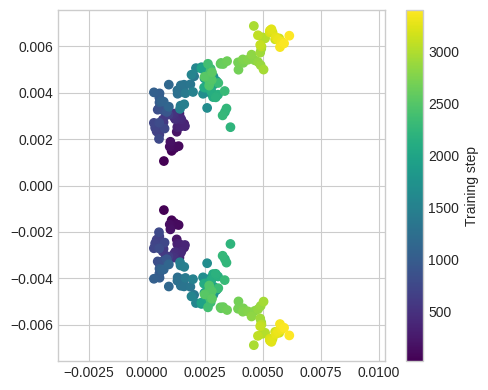

Block 19


/tmp/ipykernel_142606/2684705167.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("viridis")


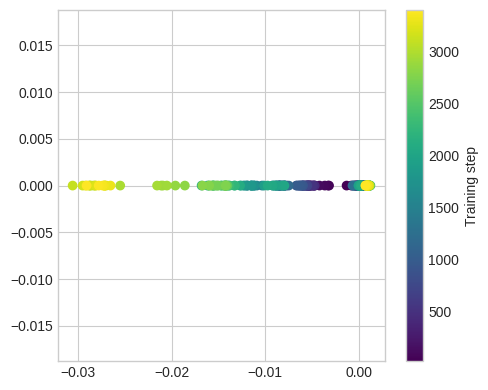

Block 20


/tmp/ipykernel_142606/2684705167.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("viridis")


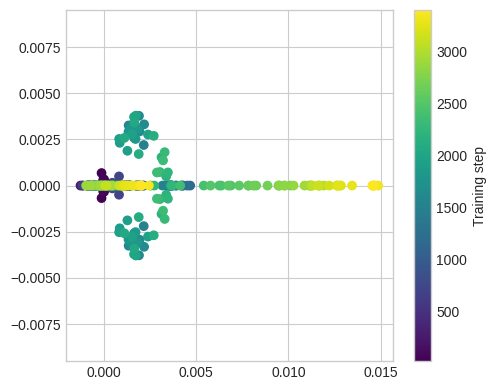

Block 21


/tmp/ipykernel_142606/2684705167.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("viridis")


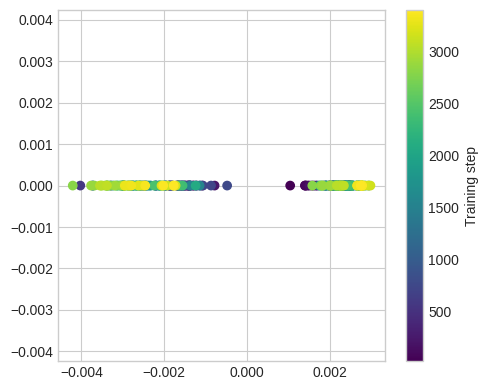

Block 22


/tmp/ipykernel_142606/2684705167.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("viridis")


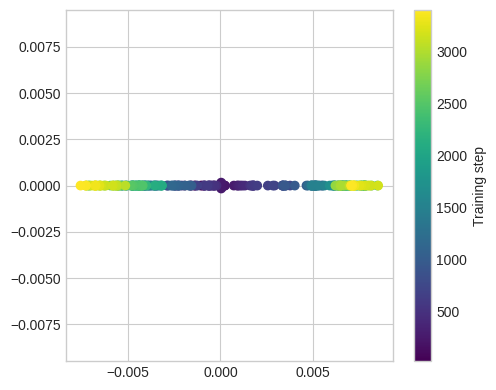

Block 23


/tmp/ipykernel_142606/2684705167.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("viridis")


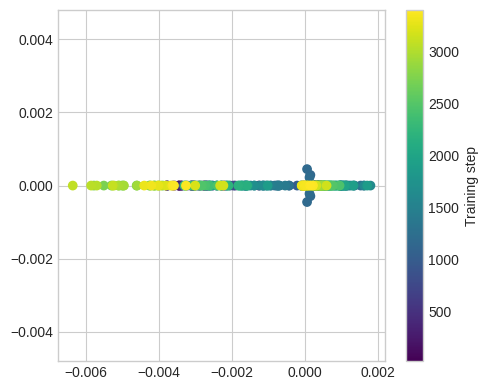

Block 24


/tmp/ipykernel_142606/2684705167.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("viridis")


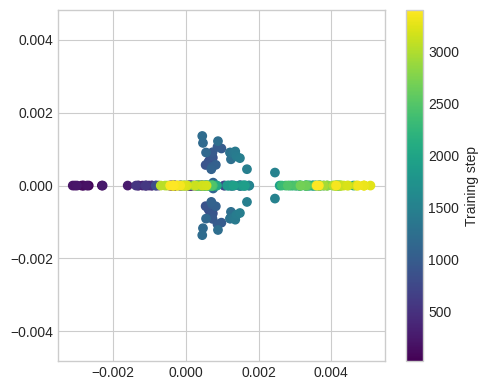

Block 25


/tmp/ipykernel_142606/2684705167.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("viridis")


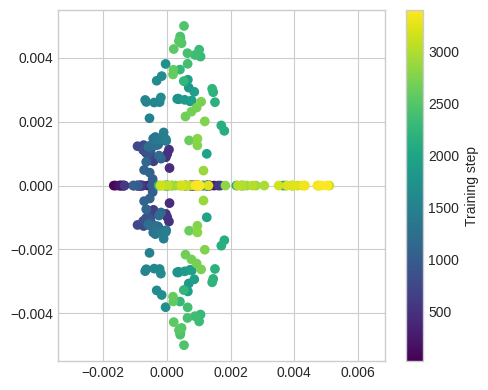

Block 26


/tmp/ipykernel_142606/2684705167.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("viridis")


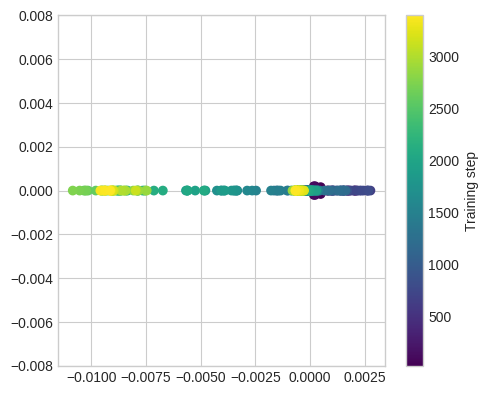

Block 27


/tmp/ipykernel_142606/2684705167.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("viridis")


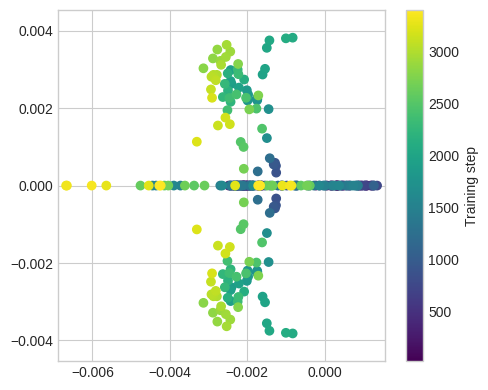

Block 28


/tmp/ipykernel_142606/2684705167.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("viridis")


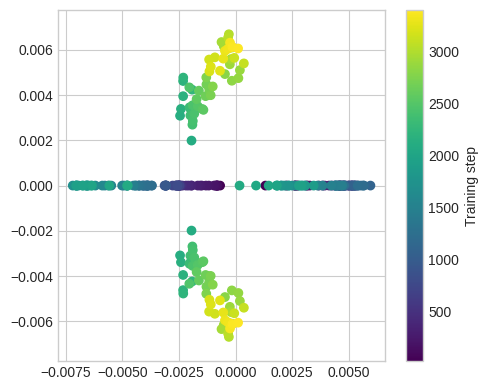

Block 29


/tmp/ipykernel_142606/2684705167.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("viridis")


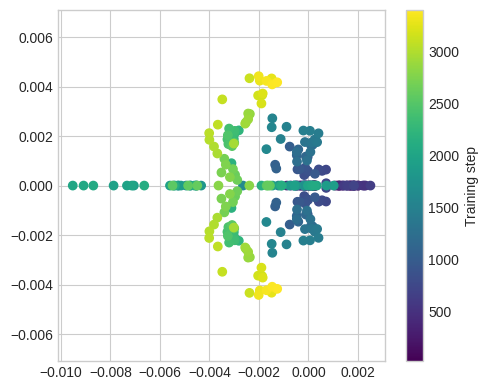

Block 30


/tmp/ipykernel_142606/2684705167.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("viridis")


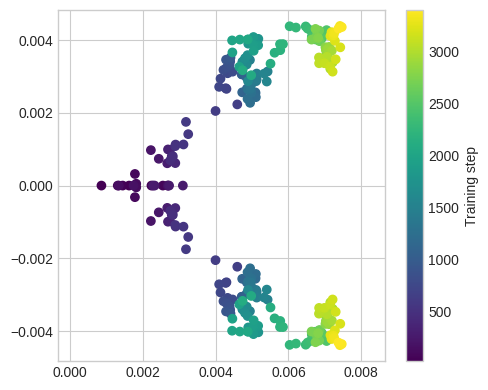

Block 31


/tmp/ipykernel_142606/2684705167.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("viridis")


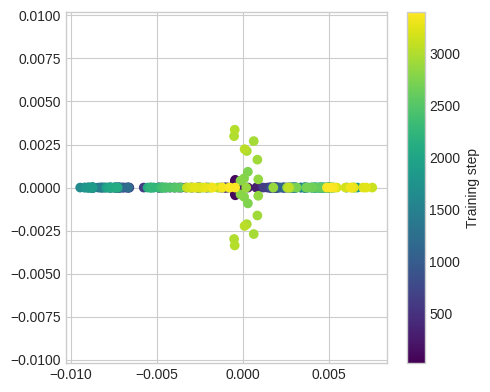

In [12]:
# import seaborn as sns
plt.style.use('seaborn-v0_8-whitegrid')
for block in df.block.unique():
    print("Block "+str(block))
    plt.figure(figsize=(5,4))
    df_block=df[df.block==block]
    cmap = plt.cm.get_cmap("viridis")
    scatter=plt.scatter(df_block.real,df_block.imag,c=df_block.checkpoint,cmap=cmap)
    plt.axis('equal')
    cbar=plt.colorbar(scatter)
    cbar.set_label("Training step")
    plt.tight_layout()
    if not os.path.exists("../figures/pdf/eig_train"):
        os.makedirs("../figures/pdf/eig_train")
    plt.savefig(f"../figures/pdf/eig_train/eigenvalues_training_{block}.pdf",bbox_inches='tight')
    plt.show()

/tmp/ipykernel_142606/168476294.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("viridis")


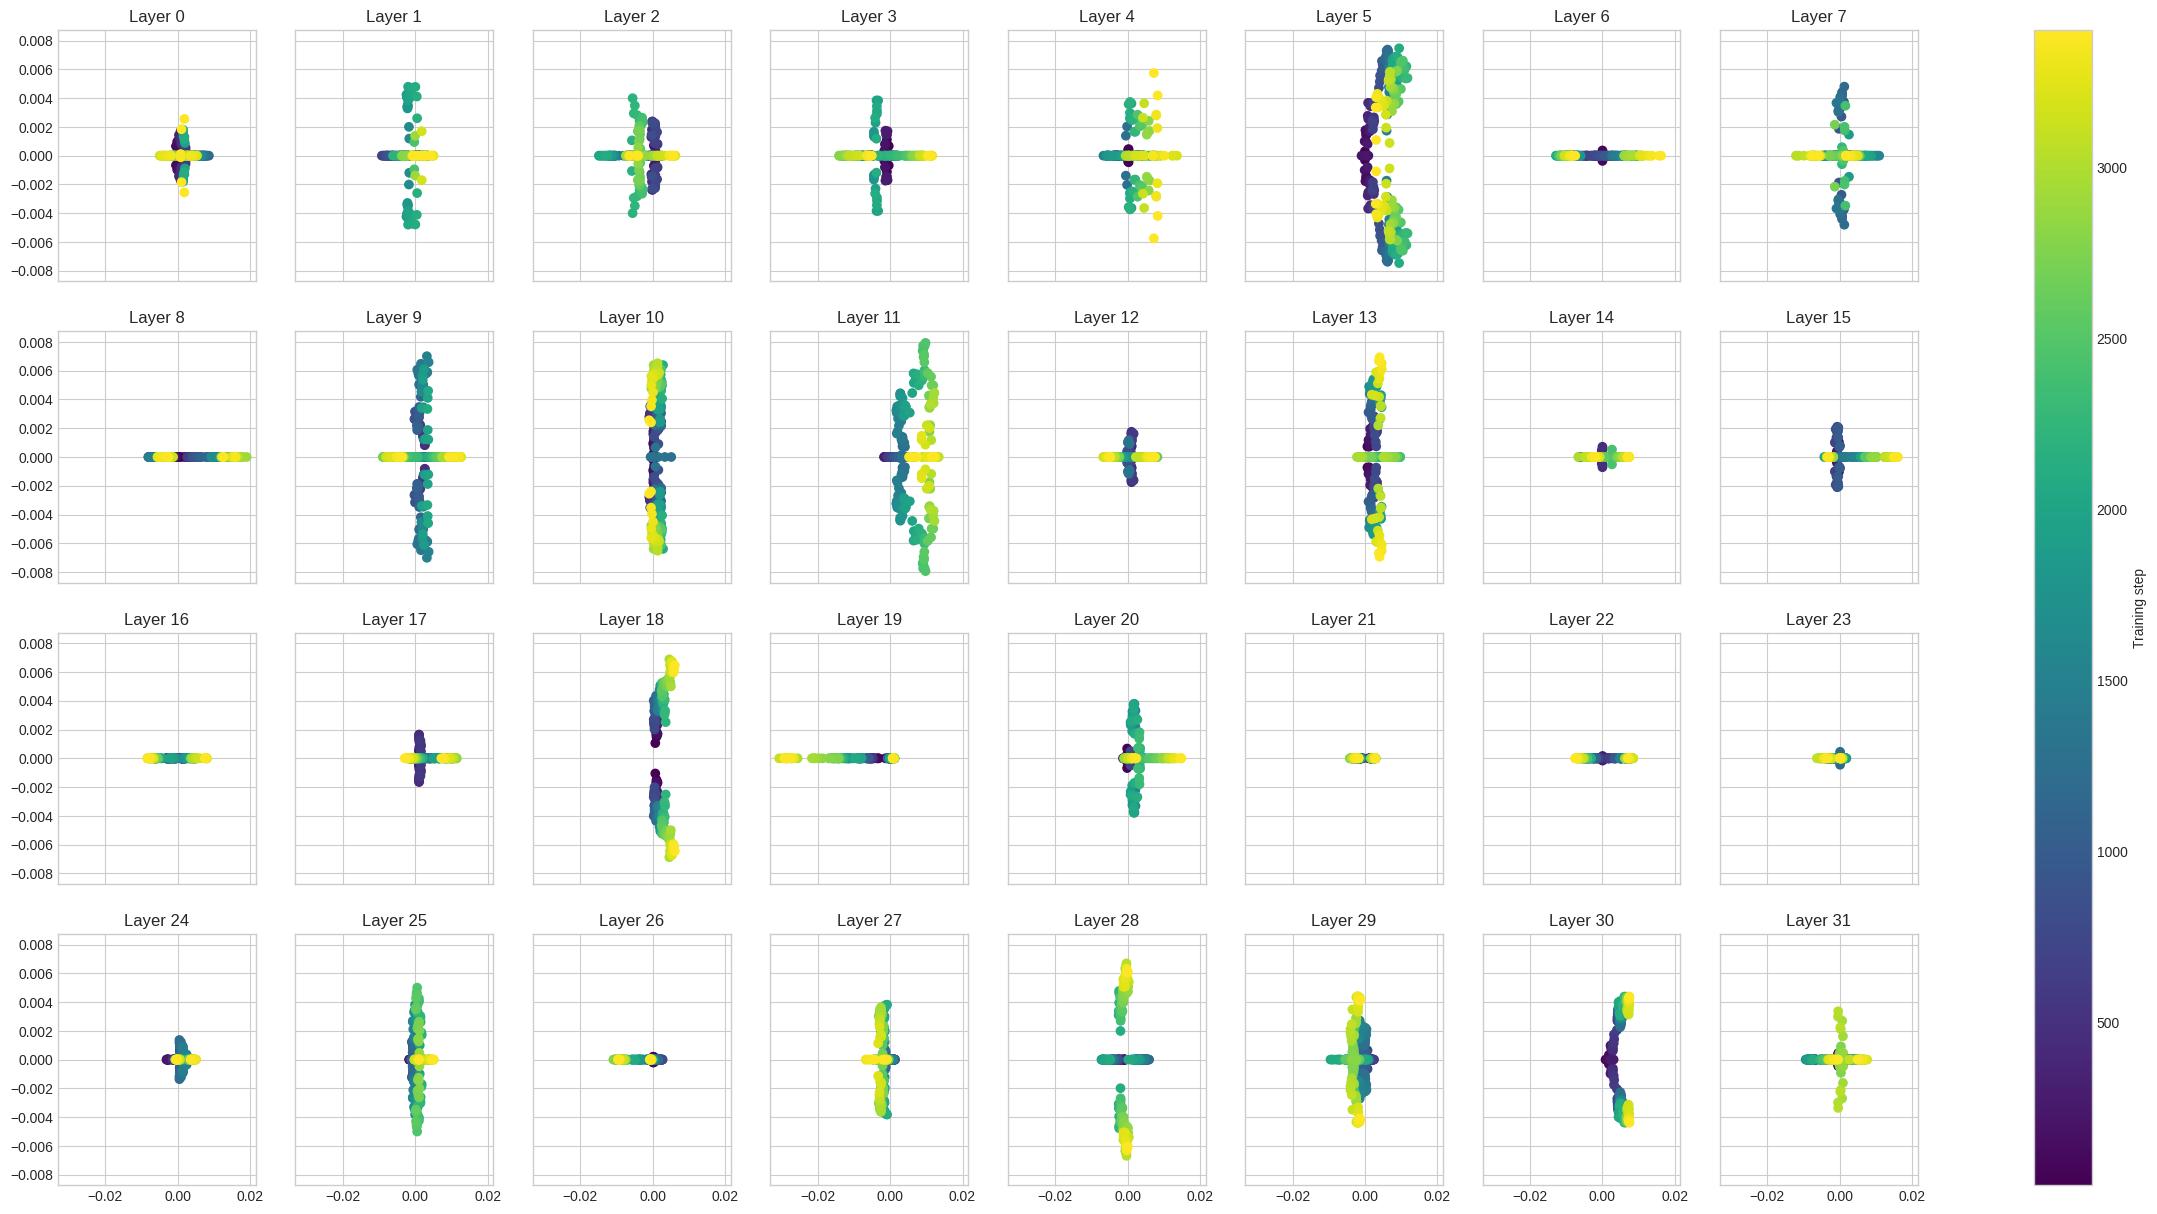

In [13]:
fig,axs=plt.subplots(4,8,sharex=True,sharey=True,figsize=(30,15))
for i in range(num_blocks):
    ax=axs[i//8,i%8]
    block=i
    df_block=df[df.block==block]
    cmap = plt.cm.get_cmap("viridis")
    scatter=ax.scatter(df_block.real,df_block.imag,c=df_block.checkpoint,cmap=cmap,vmin=25,vmax=3400)
    ax.set_title("Layer "+str(block))
    # plt.tight_layout()
    # plt.savefig(f"../figures/eigenvalues_training_{block}.pdf",bbox_inches='tight')
    # plt.show()
cbar=fig.colorbar(scatter,ax=axs.ravel().tolist())
cbar.set_label("Training step")
# plt.tight_layout()
plt.savefig(f"../figures/pdf/eigenvalues_training_all.pdf",bbox_inches='tight')
plt.show()

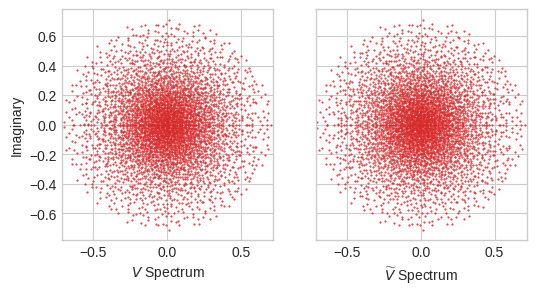

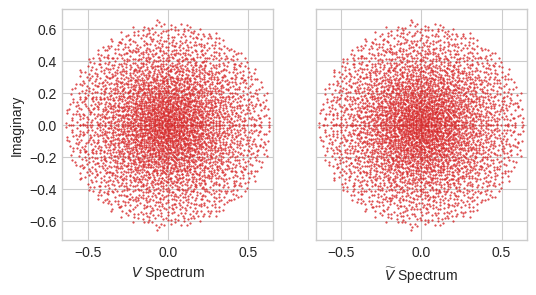

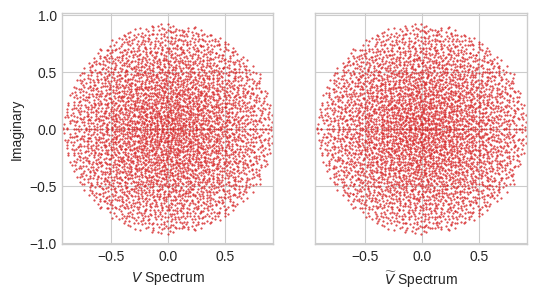

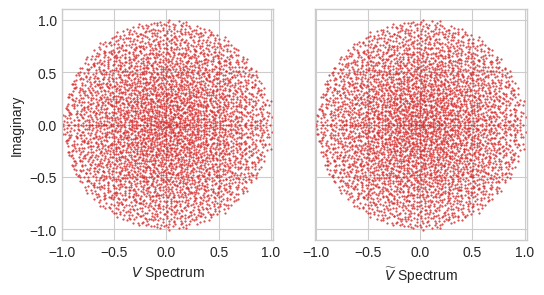

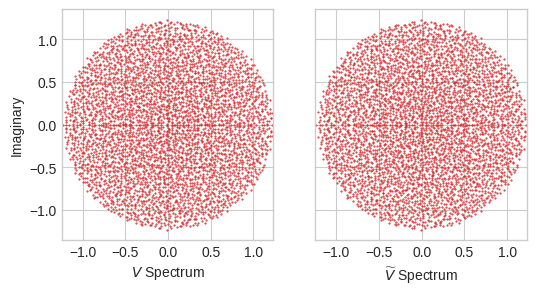

In [14]:
eigenvalues_all=np.load("../np_files/eigenvalues_all.npy")
eigenvalues_tilde_all=np.load("../np_files/eigenvalues_tilde_all.npy")
inds=[0,1,2,15,31]
for ind in inds:
    eigenvalues=eigenvalues_all[ind]
    eigenvalues_tilde=eigenvalues_tilde_all[ind]
    x=eigenvalues.real
    y=eigenvalues.imag
    x_tilde=eigenvalues_tilde.real
    y_tilde=eigenvalues_tilde.imag
    fig,axs=plt.subplots(1,2,figsize=(6,3),sharey=True)
    axs[0].scatter(x,y,marker=".",s=1,color=color)
    axs[1].scatter(x_tilde,y_tilde,marker=".",s=1,color=color)
    # ax.set_title("Eigenvalues for block "+str(ind))
    axs[0].set_xlabel("$V$ Spectrum")
    axs[1].set_xlabel("$\widetilde{V}$ Spectrum")
    axs[0].set_ylabel("Imaginary")
    for i,ax in enumerate(axs):
        ax.axis('equal')
    if not os.path.exists("../figures/pdf/eig_lora"):
        os.makedirs("../figures/pdf/eig_lora")
    plt.savefig(f"../figures/pdf/eig_lora/eigenvalues_lora_{ind}.pdf",bbox_inches='tight')
    plt.show()